## PDS Assignment

In [1]:
# 1
# Import required packages
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import warnings
from IPython.display import display, HTML
import re
import matplotlib.pyplot as plt

# To supress all warnings for visual clarity. Due to warnings resulting from using verifty = False in requests.get().
# For debugging comment out as this could hide crucial warnings. 
warnings.filterwarnings('ignore')

# Link for website main page 
main_page_url = "https://sitescrape.awh.durham.ac.uk/comp42315/"

# Start on main page because first page of publications url might change if a new topic of research is added  
# before "Animation and Graphics" in the future or if the "Animation and Graphics" name is changed slightly 
# e.g. "Animation, Graphics and Visualisation". More robust to start from the main page and find the provided 
# initial publications link from there. 
page = requests.get(main_page_url, verify = False)

soup = BeautifulSoup(page.content, "html.parser")

In [2]:
type(soup)

bs4.BeautifulSoup

In [3]:
# Finds all the <a> tags which contain "publicationfull_type_" in the href. This start of the relative file path is 
# the same for all topics in the various publication topic pages and the href for this tag will give the first topic 
# page to start scraping from. 
publication_navigation_option = soup.find_all(name = "a", href = lambda href: href and "publicationfull_type_" in href)

# TODO: Add check 

# Select the one element of the publication_navigation_option list
publication_navigation_option = publication_navigation_option[0]

print(publication_navigation_option)

publication_navigation_relative_url = publication_navigation_option.get("href")

print(type(publication_navigation_relative_url))
print(publication_navigation_relative_url)

<a href="publicationfull_type_animationandgraphics.htm"><span>PUBLICATIONS</span><span>to innovate</span></a>
<class 'str'>
publicationfull_type_animationandgraphics.htm


In [4]:
# Concatinate main page url (global) and publication partial url (relative) to get global url for publications page
publication_navigation_full_url = main_page_url + publication_navigation_relative_url

page = requests.get(publication_navigation_full_url, verify = False)

soup = BeautifulSoup(page.content, "html.parser")

In [5]:
# Find all links in the publications page which follow the topic page format 
# This finds the link for the current page from the PUBLICATIONS span and all other links from the Topic section 
publication_page_elements = soup.find_all(name = "a", href = lambda href: href and "publicationfull_type_" in href)

publication_page_urls = []

for element in publication_page_elements:
    
    publication_page_urls.append(element.get("href"))
    
    print(element.get("href"))

publicationfull_type_animationandgraphics.htm
publicationfull_type_movementevaluation.htm
publicationfull_type_biomedicalengineering.htm
publicationfull_type_interactionmodelling.htm
publicationfull_type_others.htm
publicationfull_type_actionrecognition.htm
publicationfull_type_depthand3destimation.htm
publicationfull_type_virtualreality.htm
publicationfull_type_facialfeatureanalysis.htm
publicationfull_type_3dsurfaces.htm
publicationfull_type_crowdsimulation.htm
publicationfull_type_robotics.htm
publicationfull_type_handmodelling.htm
publicationfull_type_computationalintelligence.htm
publicationfull_type_biometrics.htm
publicationfull_type_environmentcapturing.htm
publicationfull_type_motionanalysis.htm
publicationfull_type_literaturereview.htm


In [6]:
# Loop through all topic pages in publications and scrape 

# TODO: Just for testing - remove 
publication_page_urls = publication_page_urls[:]

# Create empty dataframe with required column titles 
publications_dataframe = pd.DataFrame(columns = ["Publication Title", "Year", "Author List"])

for topic_relative_url in publication_page_urls:
    
    topic_global_url = main_page_url + topic_relative_url
    
    page = requests.get(topic_global_url, verify = False)
    
    soup = BeautifulSoup(page.content, "html.parser")
    
    publications = soup.find_all(name = "div", class_ = "w3-cell-row")
    
    publication_titles = []
    
    publication_years = []
    
    publication_authors = []
    
    for publication in publications:
        
        publication_title = publication.find_all(name = "span", class_ = "PublicationTitle")
        
        if (len(publication_title)) == 0:
            
            print("Error: Publication element has no title. Please investigate!")
            
        elif (len(publication_title)) > 1:
                
            print("Error: Publication element has more than one title. Please investigate!")
                
        else:
            
            # .contents[0] ensures that the additional text after publication titles is not include e.g. "Best Paper Award"
            publication_titles.append(publication_title[0].contents[0])
            
        publication_TextSmalls = publication.find_all(name = "span", class_ = "TextSmall")
        
        if (len(publication_TextSmalls)) < 3:
            
            print("Error: Publication element has less tags of TextSmall class than anticipated. Please investigate!")
            
        elif (len(publication_title)) > 3:
                
            print("Error: Publication element has more tags of TextSmall class than anticipated. Please investigate!")
                
        else:
            
            # .rstrip() just in case there is a space at end of text as opposed to year
            publication_years.append(publication_TextSmalls[0].text.rstrip()[-4:])
            
            publication_authors.append(publication_TextSmalls[1].text)
    
    #print(publication_titles)
    #print(publication_years)
    #print(publication_authors)
    
    topic_i_dataframe = pd.DataFrame({"Publication Title" : publication_titles, 
                                      "Year" : publication_years, 
                                      "Author List" : publication_authors})
    
    publications_dataframe = pd.concat([publications_dataframe, topic_i_dataframe], ignore_index = True)
    
    
print(publications_dataframe)
    

                                     Publication Title  Year  \
0    A Video-Based Augmented Reality System for Hum...  2023   
1    GAN-based Reactive Motion Synthesis with Class...  2022   
2    Spatio-temporal Manifold Learning for Human Mo...  2021   
3    A Quadruple Diffusion Convolutional Recurrent ...  2021   
4    A Generic Framework for Editing and Synthesizi...  2019   
..                                                 ...   ...   
216  Triplet Loss with Channel Attention for Person...  2019   
217  Less is More: Reducing Task and Model Complexi...  2023   
218  Enhancing Perception and Immersion in Pre-Capt...  2023   
219  Hierarchical Graph Convolutional Networks for ...  2023   
220  On the Design Fundamentals of Diffusion Models...  2023   

                                           Author List  
0    Kanglei Zhou, Ruizhi Cai, Yue Ma, Qingqing Tan...  
1    Qianhui Men, Hubert P. H. Shum, Edmond S. L. H...  
2    He Wang, Edmond S. L. Ho, Hubert P. H. Shum an...  
3  

In [7]:
# TODO: Check results
publications_dataframe.iat[0,0]

'A Video-Based Augmented Reality System for Human-in-the-Loop Muscle Strength Assessment of Juvenile Dermatomyositis'

In [8]:
# Create a column with the number of authors
publications_dataframe["Number of Authors"] = publications_dataframe["Author List"].str.replace(" and ", ", ").str.split(", ").apply(len)

# TODO: Check number of authors isn't 0 

print(publications_dataframe)

# Remove rows with duplicate publication titles
unique_publications_dataframe = publications_dataframe.drop_duplicates(subset = "Publication Title")

# Sort dataframe by descending year, then descending no. of authors, then alphabetically
unique_publications_dataframe = unique_publications_dataframe.sort_values(by = ["Year", "Number of Authors", "Publication Title"], ascending = [False, False, True])

# Add row numbers column starting from 1
unique_publications_dataframe.insert(0, "", range(1, len(unique_publications_dataframe) + 1))

print(unique_publications_dataframe)

                                     Publication Title  Year  \
0    A Video-Based Augmented Reality System for Hum...  2023   
1    GAN-based Reactive Motion Synthesis with Class...  2022   
2    Spatio-temporal Manifold Learning for Human Mo...  2021   
3    A Quadruple Diffusion Convolutional Recurrent ...  2021   
4    A Generic Framework for Editing and Synthesizi...  2019   
..                                                 ...   ...   
216  Triplet Loss with Channel Attention for Person...  2019   
217  Less is More: Reducing Task and Model Complexi...  2023   
218  Enhancing Perception and Immersion in Pre-Capt...  2023   
219  Hierarchical Graph Convolutional Networks for ...  2023   
220  On the Design Fundamentals of Diffusion Models...  2023   

                                           Author List  Number of Authors  
0    Kanglei Zhou, Ruizhi Cai, Yue Ma, Qingqing Tan...                 10  
1    Qianhui Men, Hubert P. H. Shum, Edmond S. L. H...                  4  
2  

In [9]:
# Display all rows in a dataframe
pd.set_option("display.max_rows", None)
# Display all columns in a dataframe
pd.set_option("display.max_columns", None)
# Display all text within cells in a dataframe
pd.set_option("display.max_colwidth", None)

# Display dataframe of unique publications which dynamically adjusts to screen size and 
# still displays all information
display(HTML(unique_publications_dataframe.to_html(index = False)))

,Publication Title,Year,Author List,Number of Authors
1,A Video-Based Augmented Reality System for Human-in-the-Loop Muscle Strength Assessment of Juvenile Dermatomyositis,2023,"Kanglei Zhou, Ruizhi Cai, Yue Ma, Qingqing Tan, Xinning Wang, Jianguo Li, Hubert P. H. Shum, Frederick W. B. Li, Song Jin and Xiaohui Liang",10
2,A Mixed Reality Training System for Hand-Object Interaction in Simulated Microgravity Environments,2023,"Kanglei Zhou, Chen Chen, Yue Ma, Zhiying Leng, Hubert P. H. Shum, Frederick W. B. Li and Xiaohui Liang",7
3,Correlation-Distance Graph Learning for Treatment Response Prediction from rs-fMRI,2023,"Xiatian Zhang, Sisi Zheng, Hubert P. H. Shum, Haozheng Zhang, Nan Song, Mingkang Song and Hongxiao Jia",7
4,Unaligned 2D to 3D Translation with Conditional Vector-Quantized Code Diffusion using Transformers,2023,"Abril Corona-Figueroa, Sam Bond-Taylor, Neelanjan Bhowmik, Yona Falinie A. Gaus, Toby P. Breckon, Hubert P. H. Shum and Chris G. Willcocks",7
5,Region-Based Appearance and Flow Characteristics for Anomaly Detection in Infrared Surveillance Imagery,2023,"Yona Falinie A. Gaus, Neelanjan Bhowmik, Brian K. S. Isaac-Medina, Hubert P. H. Shum, Amir Atapour-Abarghouei and Toby P. Breckon",6
6,Hard No-Box Adversarial Attack on Skeleton-Based Human Action Recognition with Skeleton-Motion-Informed Gradient,2023,"Zhengzhi Lu, He Wang, Ziyi Chang, Guoan Yang and Hubert P. H. Shum",5
7,Focalized Contrastive View-Invariant Learning for Self-Supervised Skeleton-Based Action Recognition,2023,"Qianhui Men, Edmond S. L. Ho, Hubert P. H. Shum and Howard Leung",4
8,Hierarchical Graph Convolutional Networks for Action Quality Assessment,2023,"Kanglei Zhou, Yue Ma, Hubert P. H. Shum and Xiaohui Liang",4
9,INCLG: Inpainting for Non-Cleft Lip Generation with a Multi-Task Image Processing Network,2023,"Shuang Chen, Amir Atapour-Abarghouei, Edmond S. L. Ho and Hubert P. H. Shum",4
10,Interaction-Aware Decision-Making for Automated Vehicles using Social Value Orientation,2023,"Luca Crosato, Hubert P. H. Shum, Edmond S. L. Ho and Chongfeng Wei",4


[Explain your design and highlight any features in this question’s report part of your Jupyter Notebook in no more than 300 words. (35%)]

**Design:**
The script begins by scraping the website main page for the URL to the initial publications page, checking for links containing "publicationfull_type_". It is assumed "publicationfull_type_" will be in the initial publications page URL in the future. This is more robust than starting from a specific topic URL as the topic category names in the publications page could change causing a hardcoded URL to fail. 

The script then scrapes the initial publications page for the relative URLs to every publications topic page, checking for links containing "publicationfull_type_". "publicationfull_type_" is unique to topic page URLs and it is assumed this will be the case in the future. This is more robust than using a hardcoded list of topic page URLs as it deals with the case where topic categories are added or changed. 

The script then combines the main_page_url with each relative topic page URL and scrapes each of the topic pages, checking for div tags with class "w3-cell-row". The "w3-cell-row" class is unique to the publication elements required to be scraped, it is assumed this will be the case in the future. It is assumed that the combined topic pages are exhaustive and any additional future publications will be either assigned to a current, new or altered topic. 

The publication title, year and author list are extracted from each publication element. 

This data is then processed and presented as specified. 

**Features:**
As little as possible is hardcoded e.g. the main_page_url is defined in the first chunk and then all relative urls are concatinated with the main_page_url when required later in the script. This makes the code more robust only requiring the main_page_url to be updated in the first chunk if it changes in the future. 

Checks are implemented throughout the script to ensure the correct data type, length of lists, etc. are returned from each stage, with error messages printed if not. This improves robustness and informs the user if the script is malfuncitoning in some way which might not be immediately obvious. 

Find all is used as opposed to find to allow for checks on the number of items returned in the list from find all, checking if the tag has not been found at all or if it has been found more times than expected. 

In [10]:
# 2
# Concatinate main page url (global) and publication partial url (relative) to get global url for publications page
# TODO: Rename to soup1 etc. 
publication_navigation_full_url = main_page_url + publication_navigation_relative_url

page = requests.get(publication_navigation_full_url, verify = False)

soup = BeautifulSoup(page.content, "html.parser")

In [11]:
publication_topics = []

for element in publication_page_elements:
    
    publication_topics.append(element.contents[0])
    
    #print(element.contents[0])
    
#print(soup.find(string = lambda text: "Topic:" in text).parent.text)

match = re.search(r":\s*(.*?)\s*/", soup.find(string = lambda text: "Topic:" in text).parent.text)

if (match):
    
    first_topic = match.group(1)
    #print(first_topic)
    
else:
    
    print("Error: No first topic found. Please investigate!")
    
publication_topics[0] = first_topic

print(publication_topics)

['Animation and Graphics', 'Movement Evaluation', 'Biomedical Engineering', 'Interaction Modelling', 'Others', 'Action Recognition', 'Depth and 3D Estimation', 'Virtual Reality', 'Facial Feature Analysis', '3D Surfaces', 'Crowd Simulation', 'Robotics', 'Hand Modelling', 'Computational Intelligence', 'Biometrics', 'Environment Capturing', 'Motion Analysis', 'Literature Review']


In [12]:
# Loop through all topic pages in publications and scrape 

# TODO: Name all variables which are used from Question 1

# TODO: Just for testing - remove 
publication_page_urls = publication_page_urls[:]

# TODO: Add above cell here? 

# Create empty dataframe with required column titles 
journal_papers_dataframe = pd.DataFrame(columns = ["Publication Title", "Year", "Number of Citations", "Topic", "LDOR"])

for i, topic_relative_url in enumerate(publication_page_urls):
    
    topic_global_url = main_page_url + topic_relative_url
    
    page = requests.get(topic_global_url, verify = False)
    
    soup = BeautifulSoup(page.content, "html.parser")
    
    journal_headers = soup.find_all(name = "h2", id = "Journal Papers")
    
    #print(journal_headers)
    
    # TODO: Check if too many journal headers 
    
    # Skip to the next iteration of the for loop (skip to the next topic page) if there are no Journal Papers 
    # present in the current topic page 
    if (len(journal_headers) < 1):
        
        continue
    
    journal_header = journal_headers[0]
    
    journal_div = journal_header.find_next_sibling(name = "div")
    
    journal_papers = journal_div.find_all(name = "div", class_ = "w3-cell-row")
    
    journal_paper_titles = []
    
    journal_paper_years = []
    
    journal_paper_ncitations = []
    
    # Add rows of journal_paper_topics as value of ith publication_topics
    journal_paper_topics = []
    
    journal_paper_ldors = []
    
    for journal_paper in journal_papers:
        
        journal_paper_title = journal_paper.find_all(name = "span", class_ = "PublicationTitle")
        
        if (len(journal_paper_title)) == 0:
            
            print("Error: Publication element has no title. Please investigate!")
            
        elif (len(journal_paper_title)) > 1:
                
            print("Error: Publication element has more than one title. Please investigate!")
                
        else:
            
            # .contents[0] ensures that the additional text after publication titles is not include e.g. "Best Paper Award"
            journal_paper_titles.append(journal_paper_title[0].contents[0])
            
        journal_paper_TextSmalls = journal_paper.find_all(name = "span", class_ = "TextSmall")
        
        if (len(journal_paper_TextSmalls)) < 3:
            
            print("Error: Publication element has less tags of TextSmall class than anticipated. Please investigate!")
            
        elif (len(journal_paper_TextSmalls)) > 3:
            
            print("Error: Publication element has more tags of TextSmall class than anticipated. Please investigate!")
            
        else:
            
            # .rstrip() just in case there is a space at end of text as opposed to year
            journal_paper_years.append(journal_paper_TextSmalls[0].text.rstrip()[-4:])
        
        journal_paper_topics.append(publication_topics[i])
        
        # TODO: Implement scraping individual publication pages 
        
        journal_paper_relative_url = journal_paper_TextSmalls[2].find(name = "a", class_ = "LinkButton").get("href")
        
        journal_paper_global_url = main_page_url + journal_paper_relative_url
        
        page = requests.get(journal_paper_global_url, verify = False)
        
        soup = BeautifulSoup(page.content, "html.parser")
        
        citation_text = soup.find(string = lambda text: "Citation:" in text)
        
        if (citation_text == None):
            
            n_citations = 0
        
        else:
            
            match = re.search(r"Citation:(.*?)##", citation_text.parent.text)
            
            n_citations = match.group(1)
            #print(n_citations) 
        
        journal_paper_ncitations.append(n_citations)
        
        
        ldor_header = soup.find(name = "h2", text = "Links, Downloads and Online Resources")
        
        if (ldor_header ==  None):
        
            n_ldors = 0
            
        else:
            
            ldors = ldor_header.find_next_sibling(name = "div")
            
            links = len(ldors.find_all(name = "div", class_ = "ImgThumbnailDiv"))
            
            yt_vids = len(ldors.find_all(class_ = "youtube-player"))
            
            n_ldors = links + yt_vids
    
        journal_paper_ldors.append(n_ldors)
    
    #print(journal_paper_titles)
    #print(journal_paper_years)
    #print(journal_paper_ncitations)
    #print(journal_paper_topics)
    #print(journal_paper_ldors)
    
    topic_i_dataframe = pd.DataFrame({"Publication Title" : journal_paper_titles, 
                                      "Year" : journal_paper_years, 
                                      "Number of Citations" : journal_paper_ncitations,
                                      "Topic" : journal_paper_topics,
                                      "LDOR" : journal_paper_ldors})
    
    journal_papers_dataframe = pd.concat([journal_papers_dataframe, topic_i_dataframe], ignore_index = True)
    
    
journal_papers_dataframe
    

,Publication Title,Year,Number of Citations,Topic,LDOR
0,A Video-Based Augmented Reality System for Human-in-the-Loop Muscle Strength Assessment of Juvenile Dermatomyositis,2023,2,Animation and Graphics,4
1,GAN-based Reactive Motion Synthesis with Class-aware Discriminators for Human-human Interaction,2022,9,Animation and Graphics,4
2,Spatio-temporal Manifold Learning for Human Motions via Long-horizon Modeling,2021,68,Animation and Graphics,4
3,A Quadruple Diffusion Convolutional Recurrent Network for Human Motion Prediction,2021,16,Animation and Graphics,5
4,A Generic Framework for Editing and Synthesizing Multimodal Data with Relative Emotion Strength,2019,5,Animation and Graphics,4
5,Multi-layer Lattice Model for Real-Time Dynamic Character Deformation,2015,25,Animation and Graphics,4
6,Human Motion Variation Synthesis with Multivariate Gaussian Processes,2014,7,Animation and Graphics,4
7,Topology Aware Data-Driven Inverse Kinematics,2013,26,Animation and Graphics,5
8,Natural Preparation Behavior Synthesis,2013,2,Animation and Graphics,4
9,Simulating Multiple Character Interactions with Collaborative and Adversarial Goals,2012,48,Animation and Graphics,7


In [13]:
# TODO: Work out what question means bt filtering for unique values because this doesn't make sense 
# when calculating grouped statistics 

# Remove rows with duplicate publication titles grouped by topic - currently none but more robust 
unique_journal_papers_dataframe_bytopic = journal_papers_dataframe.drop_duplicates(subset = ["Topic", "Publication Title"])

# Remove rows with duplicate publication titles 
unique_journal_papers_dataframe = journal_papers_dataframe.drop_duplicates(subset = "Publication Title")

# Convert Number of Citations and LDOR columns to integers in the relevant deduplicated vs deduplicated by group dataframes
unique_journal_papers_dataframe_bytopic["Number of Citations"] = pd.to_numeric(unique_journal_papers_dataframe_bytopic["Number of Citations"], errors = "coerce")

unique_journal_papers_dataframe["Number of Citations"] = pd.to_numeric(unique_journal_papers_dataframe["Number of Citations"], errors = "coerce")
unique_journal_papers_dataframe["LDOR"] = pd.to_numeric(unique_journal_papers_dataframe["LDOR"], errors = "coerce")


In [14]:
print(journal_papers_dataframe.shape)
print(unique_journal_papers_dataframe_bytopic.shape)
print(unique_journal_papers_dataframe.shape)

(94, 5)
(94, 5)
(68, 5)


In [15]:
# TODO: Work out if Figure 1 is meant to be a table or a graph in addition to the table 
# Create citations table 
citations_dataframe = unique_journal_papers_dataframe_bytopic.groupby("Topic")["Number of Citations"].agg(["mean", "var"])

# Round mean and var columns to 1 decimal place 
citations_dataframe = citations_dataframe.round({"mean" : 1, "var" : 1})

# Rename columns 
citations_dataframe.rename(columns = {"mean" : "Mean Number of Citations per Journal Paper",
                                      "var" : "Variance of Citations per Journal Paper"})


,Mean Number of Citations per Journal Paper,Variance of Citations per Journal Paper
Topic,,
3D Surfaces,13.4,74.8
Action Recognition,35.0,1289.0
Animation and Graphics,25.7,842.8
Biomedical Engineering,33.9,2448.1
Biometrics,16.4,314.0
Computational Intelligence,18.0,223.0
Crowd Simulation,15.4,139.3
Depth and 3D Estimation,59.4,4432.8
Facial Feature Analysis,10.0,74.5


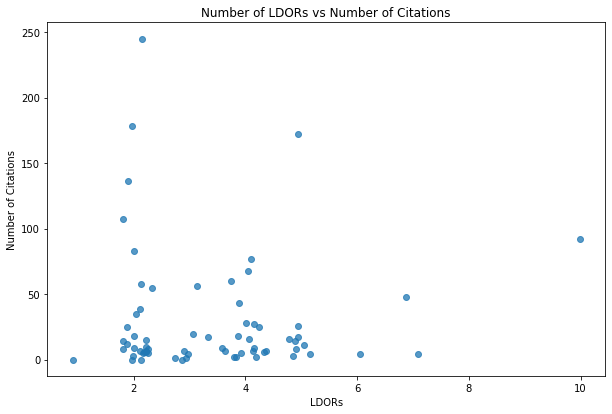

In [16]:
# Figure 2

np.random.seed(123)

plt.figure(figsize = (10, 6.5))
# Jitter the LDORs values to prevent overplotting 
plt.scatter(unique_journal_papers_dataframe["LDOR"] + np.random.normal(0, 0.15, size = unique_journal_papers_dataframe["LDOR"].shape), 
            unique_journal_papers_dataframe["Number of Citations"], alpha = 0.75)
plt.title("Number of LDORs vs Number of Citations")
plt.xlabel("LDORs")
plt.ylabel("Number of Citations")

plt.show()